## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from datetime import timedelta
import collections

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# We know that MNIST images are 28 pixels in each dimension.
img_hieght = 22

img_width = 30
# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_hieght * img_width

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_hieght, img_width)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 62

In [5]:
import matplotlib.pyplot as plt 

In [11]:
import re, os, cv2
from glob import glob

def create_argmax(folder_name):
    index = int(re.search('Sample(.*)', folder_name).group(1)) - 1
    arr = np.zeros(num_classes)
    arr[index] = 1
    return arr

def cvt_img2np(path):
    img = cv2.imread(path)
#     print img.shape
    img =  cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) , (22,30)).reshape(660).astype(np.float32,copy=False)
#     img.reshape((-1,660)).astype(np.float32, copy=False) 
#     print img.shape
#     plt.imshow(img)
#     plt.show()
    return img
    
print(create_argmax('Sample001'))


#dir(re.match('[0-9]', text))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
import cv2
i = 0
cnt=0
def get_dataset():
    global cnt
    DATASET_LOCATION = './English/Hnd/Img'
    hcr = {'data':[], 'labels':[], 'cls':[]}
    for folder in glob(DATASET_LOCATION + '/*'):
            if os.path.isdir(folder):            
                for img_path in glob(folder + '/*.png'):               
                    cnt+=1
                    if cnt %100 == 0:
                        print cnt
                    hcr.get('data').append(cvt_img2np(img_path))
                    hcr.get('labels').append(create_argmax(folder))
                    hcr.get('cls').append(int(folder[-3:]) - 1)
    print('read completed')
    # shuffle data
    permutate = np.random.permutation(len(hcr.get('data')))
    return {k1:v1[permutate] for k1, v1 in {k: np.array(v) for k, v in hcr.items()}.items()}

hcr = get_dataset()

ran_iterations = 0
def get_next_batch(count):
    global ran_iterations
    data = (np.squeeze(hcr.get('data')[ran_iterations: ran_iterations + count]), np.asarray(hcr.get('labels')[ran_iterations: ran_iterations + count]))
    ran_iterations += count
    return data

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
read completed


In [13]:
print(len(hcr.get('data')))
img = hcr.get('data')[0]



3410


### Helper-function for plotting images

Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [23]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(30,22), cmap='gray')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

### Plot a few images to see if data is correct

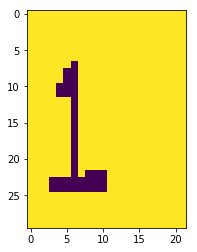

In [24]:
plt.imshow(hcr.get('data')[1000].reshape(30,22))
plt.show()

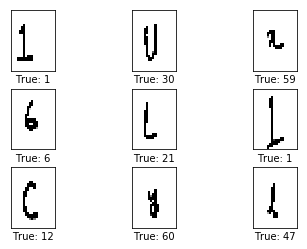

In [25]:
# Get the first images from the test-set.
images = hcr.get('data')[1000:1009]

# Get the true classes for those images.
cls_true = hcr.get('cls')[1000:1009]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [31]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [32]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [33]:
y_true_cls = tf.placeholder(tf.int64, [None])

In [34]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

The second variable that must be optimized is called `biases` and is defined as a 1-dimensional tensor (or vector) of length `num_classes`.

In [35]:
biases = tf.Variable(tf.zeros([num_classes]))

### Model

In [36]:
logits = tf.matmul(x, weights) + biases

In [37]:
y_pred = tf.nn.softmax(logits)

In [38]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [39]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [40]:
cost = tf.reduce_mean(cross_entropy)

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [42]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [43]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## TensorFlow Run

In [44]:
session = tf.Session()

In [45]:
session.run(tf.global_variables_initializer())

#### Load test dataset

In [46]:

hcr_test_data = get_dataset()
feed_dict_test = {
                  x: hcr_test_data.get('data'),
                  y_true: hcr_test_data.get('labels'),
                  y_true_cls: hcr_test_data.get('cls')
                 }

3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
read completed


In [47]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [48]:
print_accuracy()

Accuracy on test-set: 1.6%


In [61]:

total_iterations = 0

def optimize(num_iterations):
    global total_iterations    
    x_batch, y_true_batch = get_next_batch(num_iterations)  
    
    if len(x_batch):
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.

        session.run(optimizer, feed_dict=feed_dict_train)
        
        total_iterations += num_iterations                
    else: 
        print('Not running')
        
        

In [62]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = hcr.get('data')[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    print(collections.Counter(hcr_test_data.get('cls')))
    # Get the true classes for those images.
    cls_true = hcr.get('cls')[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [63]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    print(w[:])
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [64]:
ran_iterations = 0

In [78]:
for ix in range(20):    
    total_iterations = 0
    ran_iterations = 0
    for k in range(10000):
    #     print(ran_iterations)
        optimize(num_iterations=30)

        if k % 100 == 0 :
            total_iterations = 0
            ran_iterations = 0
            print_accuracy()
        #plot_weights()

Accuracy on test-set: 44.0%
Accuracy on test-set: 48.7%
Accuracy on test-set: 50.7%
Accuracy on test-set: 50.2%
Accuracy on test-set: 50.8%
Accuracy on test-set: 53.4%
Accuracy on test-set: 48.4%
Accuracy on test-set: 53.0%
Accuracy on test-set: 51.7%
Accuracy on test-set: 51.6%
Accuracy on test-set: 53.6%
Accuracy on test-set: 51.2%
Accuracy on test-set: 54.8%
Accuracy on test-set: 52.3%
Accuracy on test-set: 52.3%
Accuracy on test-set: 54.8%
Accuracy on test-set: 52.4%
Accuracy on test-set: 52.7%
Accuracy on test-set: 50.4%
Accuracy on test-set: 50.5%
Accuracy on test-set: 48.0%
Accuracy on test-set: 41.4%
Accuracy on test-set: 48.9%
Accuracy on test-set: 49.5%
Accuracy on test-set: 50.6%
Accuracy on test-set: 48.2%
Accuracy on test-set: 52.6%
Accuracy on test-set: 53.4%
Accuracy on test-set: 48.9%
Accuracy on test-set: 51.3%
Accuracy on test-set: 49.6%
Accuracy on test-set: 52.2%
Accuracy on test-set: 50.2%
Accuracy on test-set: 52.4%
Accuracy on test-set: 55.0%
Accuracy on test-set

Accuracy on test-set: 51.4%
Accuracy on test-set: 53.5%
Accuracy on test-set: 56.3%
Accuracy on test-set: 52.1%
Accuracy on test-set: 57.0%
Accuracy on test-set: 43.3%
Accuracy on test-set: 53.5%
Accuracy on test-set: 50.9%
Accuracy on test-set: 54.2%
Accuracy on test-set: 55.9%
Accuracy on test-set: 55.9%
Accuracy on test-set: 53.1%
Accuracy on test-set: 58.2%
Accuracy on test-set: 55.8%
Accuracy on test-set: 49.8%
Accuracy on test-set: 54.6%
Accuracy on test-set: 60.1%
Accuracy on test-set: 58.6%
Accuracy on test-set: 53.3%
Accuracy on test-set: 53.5%
Accuracy on test-set: 52.0%
Accuracy on test-set: 52.5%
Accuracy on test-set: 53.7%
Accuracy on test-set: 53.8%
Accuracy on test-set: 51.5%
Accuracy on test-set: 55.7%
Accuracy on test-set: 53.3%
Accuracy on test-set: 53.3%
Accuracy on test-set: 57.8%
Accuracy on test-set: 56.8%
Accuracy on test-set: 54.3%
Accuracy on test-set: 55.3%
Accuracy on test-set: 55.0%
Accuracy on test-set: 57.8%
Accuracy on test-set: 54.7%
Accuracy on test-set

Accuracy on test-set: 59.7%
Accuracy on test-set: 58.6%
Accuracy on test-set: 55.7%
Accuracy on test-set: 52.8%
Accuracy on test-set: 54.6%
Accuracy on test-set: 52.1%
Accuracy on test-set: 56.7%
Accuracy on test-set: 56.3%
Accuracy on test-set: 57.8%
Accuracy on test-set: 58.0%
Accuracy on test-set: 56.5%
Accuracy on test-set: 54.4%
Accuracy on test-set: 58.6%
Accuracy on test-set: 56.2%
Accuracy on test-set: 55.9%
Accuracy on test-set: 58.4%
Accuracy on test-set: 54.2%
Accuracy on test-set: 58.4%
Accuracy on test-set: 58.4%
Accuracy on test-set: 58.3%
Accuracy on test-set: 55.2%
Accuracy on test-set: 56.0%
Accuracy on test-set: 59.7%
Accuracy on test-set: 56.9%
Accuracy on test-set: 56.8%
Accuracy on test-set: 56.0%
Accuracy on test-set: 56.8%
Accuracy on test-set: 55.7%
Accuracy on test-set: 55.1%
Accuracy on test-set: 53.4%
Accuracy on test-set: 58.7%
Accuracy on test-set: 56.6%
Accuracy on test-set: 56.5%
Accuracy on test-set: 57.4%
Accuracy on test-set: 54.6%
Accuracy on test-set

KeyboardInterrupt: 

Accuracy on test-set: 56.9%
[[ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]
 [ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]
 [ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]
 ...
 [ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]
 [ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]
 [ 0.47484276 -2.853891   -0.28187102 ... -1.6902488   0.5608538
  -0.08295149]]


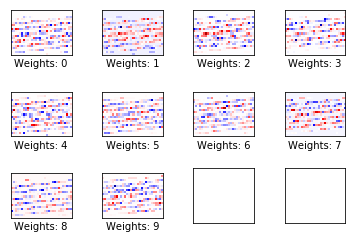

In [79]:

print_accuracy()
plot_weights()

Counter({0: 55, 1: 55, 2: 55, 3: 55, 4: 55, 5: 55, 6: 55, 7: 55, 8: 55, 9: 55, 10: 55, 11: 55, 12: 55, 13: 55, 14: 55, 15: 55, 16: 55, 17: 55, 18: 55, 19: 55, 20: 55, 21: 55, 22: 55, 23: 55, 24: 55, 25: 55, 26: 55, 27: 55, 28: 55, 29: 55, 30: 55, 31: 55, 32: 55, 33: 55, 34: 55, 35: 55, 36: 55, 37: 55, 38: 55, 39: 55, 40: 55, 41: 55, 42: 55, 43: 55, 44: 55, 45: 55, 46: 55, 47: 55, 48: 55, 49: 55, 50: 55, 51: 55, 52: 55, 53: 55, 54: 55, 55: 55, 56: 55, 57: 55, 58: 55, 59: 55, 60: 55, 61: 55})


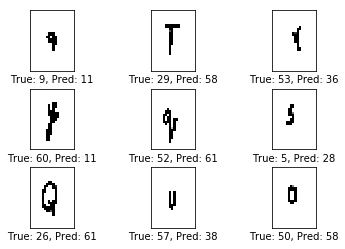

In [80]:
plot_example_errors()

#### Save trained model


In [82]:
saver = tf.train.Saver()

saver.save(sess=session, save_path='saved_models/hcr_linear_acc_91_3')

'saved_models/hcr_linear_acc_91_3'

#### Load saved model

In [84]:
# saver = tf.train.import_meta_graph('saved_models/hcr_linear_acc_72_4')
saver.restore(sess=session, save_path='saved_models/hcr_linear_acc_91_3')

INFO:tensorflow:Restoring parameters from saved_models/hcr_linear_acc_91_3


In [85]:
print(session.run(weights)[:, 6])

[-1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -4.60995808e-02 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01 -1.31091535e-01
 -1.31091535e-01 -1.31091535e-01  4.63797599e-01  2.67472315e+00
 -1.31091535e-01 -1.31091